# Import bibliotek

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} numpy pandas scipy scikit-learn seaborn matplotlib xgboost 

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm, skew
from sklearn.pipeline import Pipeline
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             mean_absolute_error,
                             mean_squared_log_error)
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor, 
                              GradientBoostingRegressor)
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# Wczytywanie i sprawdzenie danych

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Zmienne kategoryczne

In [7]:
categoric_type = train.select_dtypes(include=['object']).copy()
categoric_type

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


            index  Importance
0      Foundation  151.818960
1       HeatingQC  150.260637
2     FireplaceQu  132.057489
3    BsmtFinType1   71.106285
4        LotShape   56.793335
5       ExterQual   55.635766
6      CentralAir   50.063818
7    GarageFinish   48.552729
8    BsmtExposure   47.578033
9      Electrical   42.330105
10     PavedDrive   34.862489
11     HouseStyle   28.646412
12    Exterior2nd   22.139966
13      RoofStyle   20.802324
14   Neighborhood   17.152383
15  SaleCondition   16.906963
16          Fence   14.031377
17      ExterCond   12.682557
18    Exterior1st   12.473096
19       MSZoning   11.643721
20    KitchenQual   11.411518
21       BldgType   11.035850
22      LotConfig   10.433512
23     Functional   10.308726
24        Heating   10.025865
25          Alley    7.835521
26    LandContour    7.748614
27     GarageQual    6.564093
28       SaleType    5.235286
29    MiscFeature    3.937509
30       BsmtQual    3.719172
31         PoolQC    3.001026
32      La

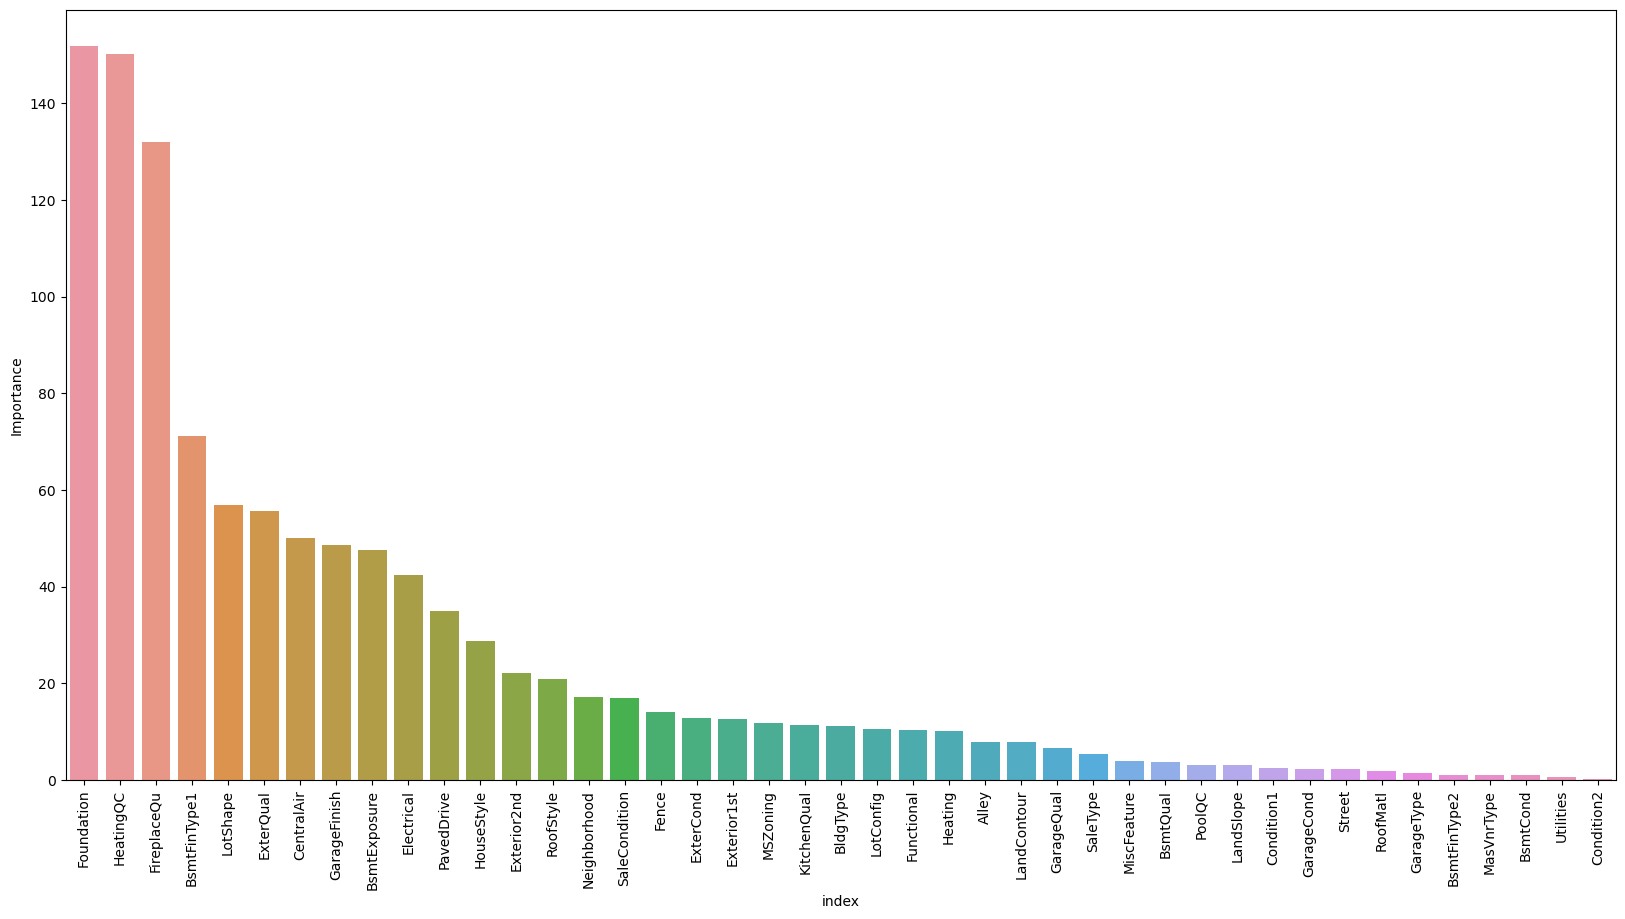

In [8]:
def f_test(X, y):
    X = X.copy()
    for col in X.columns:
        X[col], _ = X[col].factorize()
    series = pd.Series(f_regression(X, y)[1], name="Importance", index=X.columns).sort_values(ascending=True)
    return np.log(1./series).reset_index()
fr = f_test(categoric_type, train['SalePrice'])
print(fr)
fig, ax = plt.subplots(figsize=(20, 10));
sns.barplot(data=fr, x='index', y='Importance')
x=plt.xticks(rotation=90)

In [9]:
usefull_cat_cols = fr.iloc[:27,0].to_list()
useless_cat_cols = fr.iloc[27:,0].to_list()

train = train.drop(columns=useless_cat_cols, axis=1)
test = test.drop(columns=useless_cat_cols, axis=1)

In [10]:
def smart_factorize(train, test, changed_cols):
    for col in changed_cols:    
        actual_list = train.groupby(col)['SalePrice'].median().sort_values().index.to_list()
        actual_len = len(actual_list)
        actual_maping = [x for x in range(actual_len)]
        actual_dict = dict(zip(actual_list, actual_maping))
        print(col, actual_dict)

        train[col] = train[col].map(actual_dict)
        train[col] = train[col].fillna(-1)
        train[col] = train[col].astype('int')
        
        test[col] = test[col].map(actual_dict)
        test[col] = test[col].fillna(-1)
        test[col] = test[col].astype('int')
smart_factorize(train, test, usefull_cat_cols)
train[usefull_cat_cols].head()

Foundation {'Slab': 0, 'BrkTil': 1, 'Stone': 2, 'CBlock': 3, 'Wood': 4, 'PConc': 5}
HeatingQC {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
FireplaceQu {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
BsmtFinType1 {'LwQ': 0, 'BLQ': 1, 'Rec': 2, 'ALQ': 3, 'Unf': 4, 'GLQ': 5}
LotShape {'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}
ExterQual {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
CentralAir {'N': 0, 'Y': 1}
GarageFinish {'Unf': 0, 'RFn': 1, 'Fin': 2}
BsmtExposure {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
Electrical {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}
PavedDrive {'N': 0, 'P': 1, 'Y': 2}
HouseStyle {'1.5Unf': 0, '1.5Fin': 1, '2.5Unf': 2, 'SFoyer': 3, '1Story': 4, 'SLvl': 5, '2Story': 6, '2.5Fin': 7}
Exterior2nd {'CBlock': 0, 'AsbShng': 1, 'Wd Sdng': 2, 'Wd Shng': 3, 'MetalSd': 4, 'AsphShn': 5, 'Stucco': 6, 'Brk Cmn': 7, 'HdBoard': 8, 'BrkFace': 9, 'Plywood': 10, 'Stone': 11, 'ImStucc': 12, 'VinylSd': 13, 'CmentBd': 14, 'Other': 15}
RoofStyle {'Gambrel': 0, 'Gable': 1, 'Mansard': 2, '

,Foundation,HeatingQC,FireplaceQu,BsmtFinType1,LotShape,ExterQual,CentralAir,GarageFinish,BsmtExposure,Electrical,PavedDrive,HouseStyle,Exterior2nd,RoofStyle,Neighborhood,SaleCondition,Fence,ExterCond,Exterior1st,MSZoning,KitchenQual,BldgType,LotConfig,Functional,Heating,Alley,LandContour
0,5,4,-1,5,0,2,1,1,0,4,2,6,13,1,16,4,-1,4,11,3,2,3,0,6,5,-1,1
1,3,4,2,3,0,1,1,1,3,4,2,4,4,1,19,4,-1,4,6,3,1,3,2,6,5,-1,1
2,5,4,2,5,1,2,1,1,1,4,2,6,13,1,16,4,-1,4,11,3,2,3,0,6,5,-1,1
3,1,3,3,3,1,1,1,0,0,4,2,6,3,1,18,1,-1,4,5,3,2,3,1,6,5,-1,1
4,5,4,2,5,1,2,1,1,2,4,2,6,13,1,23,4,-1,4,11,3,2,3,2,6,5,-1,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   Neighborhood   1460 non-null   int32  
 10  BldgType       1460 non-null   int32  
 11  HouseStyle     1460 non-null   int32  
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   int32  
 17  Exterior1st    1460 non-null   int32  
 18  Exterior

# Analiza zmiennych z nullami

In [12]:
train.corr().loc['SalePrice', ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

LotFrontage    0.351799
MasVnrArea     0.477493
GarageYrBlt    0.486362
Name: SalePrice, dtype: float64

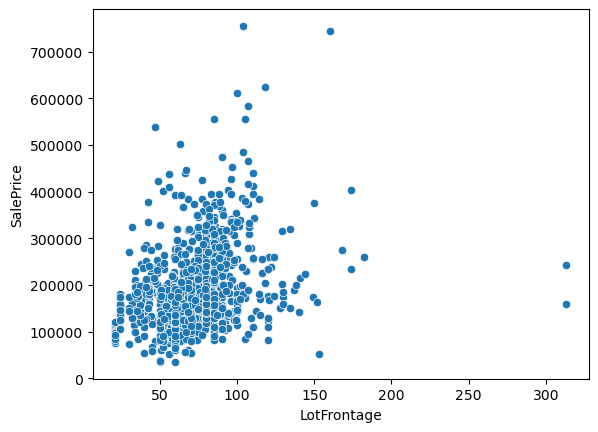

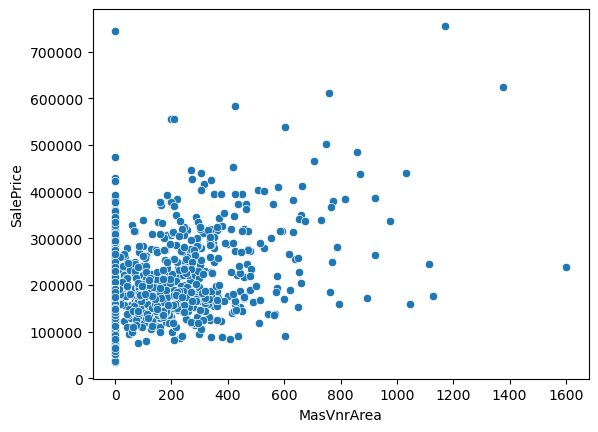

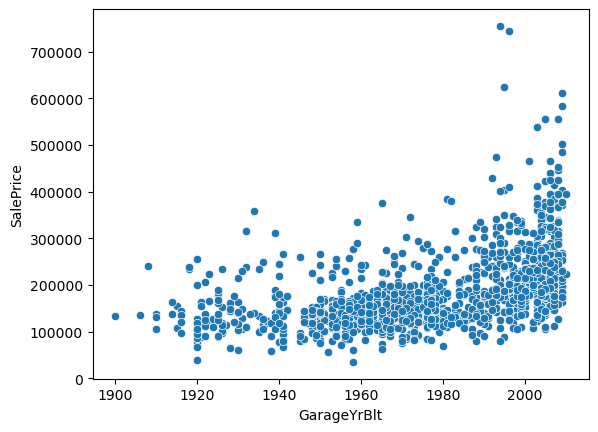

In [13]:
for col in  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    sns.scatterplot(data=train, x=col, y='SalePrice')
    plt.show()

In [14]:
for col in  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    print(train.corr()[[col]].nlargest(10, col))

              LotFrontage
LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
MSZoning         0.271431
              MasVnrArea
MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
Neighborhood    0.370727
GarageCars      0.364204
TotalBsmtSF     0.363936
ExterQual       0.351524
1stFlrSF        0.344501
              GarageYrBlt
GarageYrBlt      1.000000
YearBuilt        0.825667
Foundation       0.671503
YearRemodAdd     0.642277
Neighborhood     0.589653
GarageCars       0.588920
ExterQual        0.583296
Exterior2nd      0.583016
Exterior1st      0.565438
GarageArea       0.564567


In [15]:
train['SalePrice'].corr(train['YearBuilt'])

0.5228973328794969

<AxesSubplot: xlabel='GarageYrBlt', ylabel='YearBuilt'>

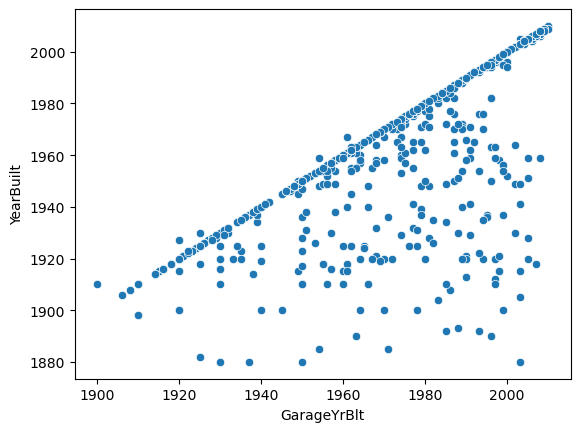

In [16]:
sns.scatterplot(data=train, x='GarageYrBlt', y='YearBuilt')

# Pozbycie się brakujących wartości

In [17]:
train = train.drop(columns = 'GarageYrBlt')
test = test.drop(columns = 'GarageYrBlt')
for col in  ['LotFrontage', 'MasVnrArea']:
    train[col] = train[col].fillna(train[col].median()).astype('int')
train.isna().sum().sum()

0

# Dalsza selekcja zmiennych

In [18]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

mi_scores = make_mi_scores(X, y)
mi_scores

OverallQual      0.508434
Neighborhood     0.391003
GrLivArea        0.372981
GarageCars       0.369618
ExterQual        0.335112
KitchenQual      0.325997
GarageArea       0.288584
GarageFinish     0.268048
FullBath         0.266625
TotalBsmtSF      0.262326
YearBuilt        0.262131
1stFlrSF         0.241008
FireplaceQu      0.209886
Foundation       0.200232
YearRemodAdd     0.199322
TotRmsAbvGrd     0.188938
Fireplaces       0.171190
HeatingQC        0.155861
LotFrontage      0.128396
BsmtFinSF1       0.126534
Exterior1st      0.119990
MSZoning         0.119126
Exterior2nd      0.118130
BsmtFinType1     0.114282
OverallCond      0.112008
LotArea          0.099627
2ndFlrSF         0.097645
MasVnrArea       0.093580
HalfBath         0.083980
LotShape         0.074973
OpenPorchSF      0.073334
SaleCondition    0.073294
BedroomAbvGr     0.064259
CentralAir       0.062404
HouseStyle       0.061888
MSSubClass       0.061210
BsmtExposure     0.057306
PavedDrive       0.055734
Electrical  

In [19]:
best_features = mi_scores.iloc[:30].index.to_list()

train = train[best_features]
train['SalePrice'] = y

id = test['Id']
test = test[best_features]
test['Id'] = id

<AxesSubplot: >

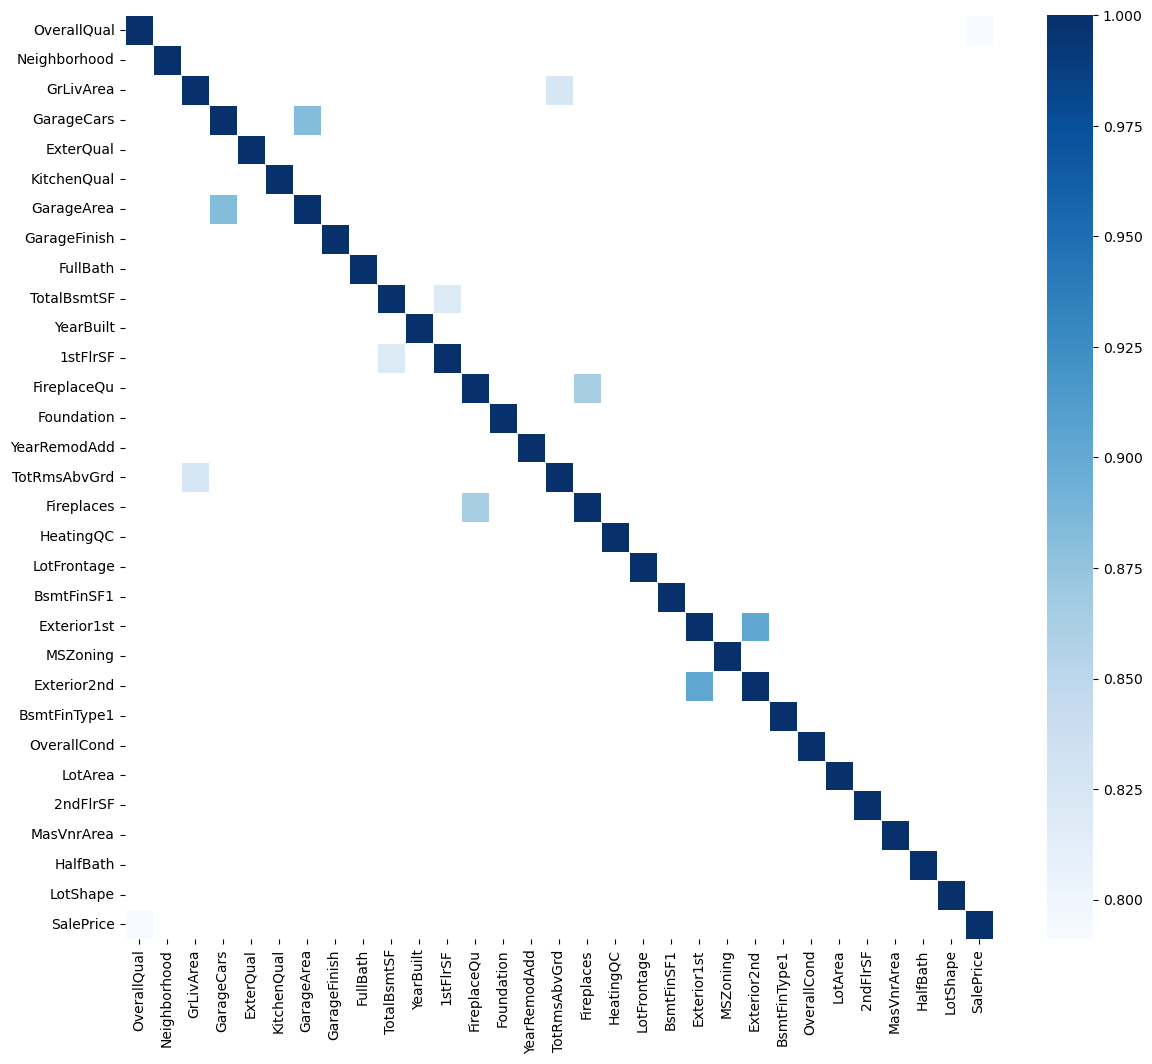

In [20]:
plt.figure(figsize=(14,12))
corr = train.corr()
sns.heatmap(corr, mask = corr <0.75, linewidth=0.5, cmap='Blues')

# Analiza skorelowanych zmiennych

In [21]:
print(corr.loc['GarageArea','GarageCars'])
print(corr.loc['GrLivArea','TotRmsAbvGrd'])
print(corr.loc['Exterior1st','Exterior2nd'])

0.882475414281462
0.8254893743088425
0.9022538394261308


In [22]:
def print_corelations(columns):
    for col in columns:
        print (col, y.corr(train[col]))
print_corelations(['GarageArea', 'GarageCars','GrLivArea', 'TotRmsAbvGrd', 'Exterior1st', 'Exterior2nd'])

GarageArea 0.6234314389183617
GarageCars 0.6404091972583531
GrLivArea 0.7086244776126522
TotRmsAbvGrd 0.5337231555820284
Exterior1st 0.37101839815930354
Exterior2nd 0.3620522426256927


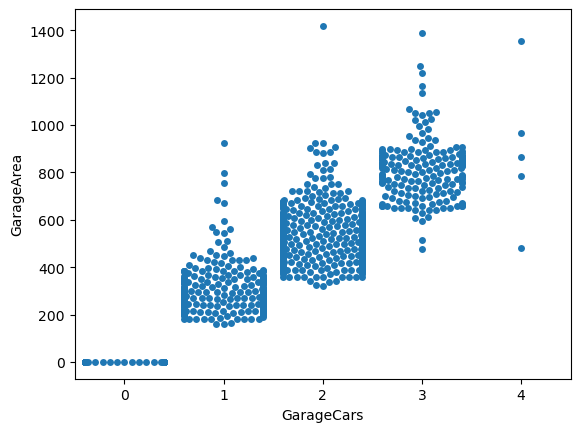

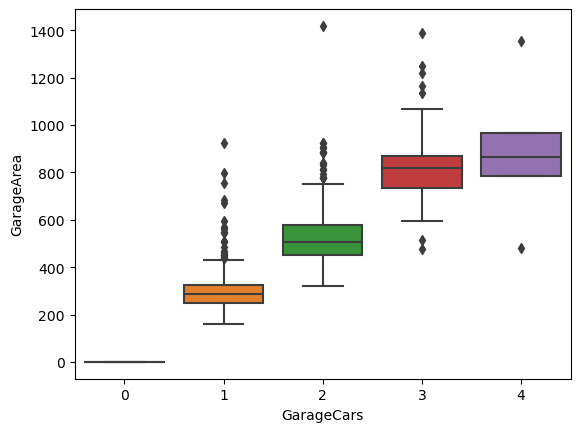

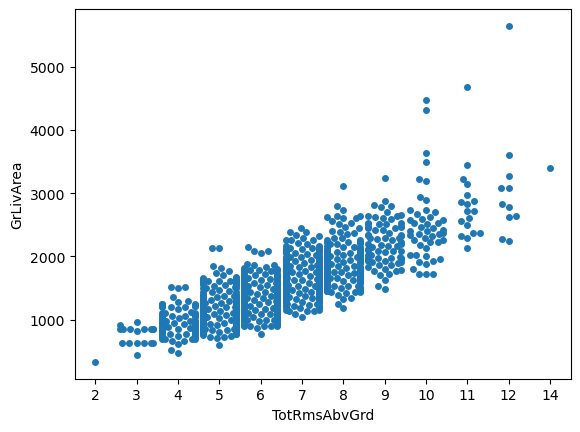

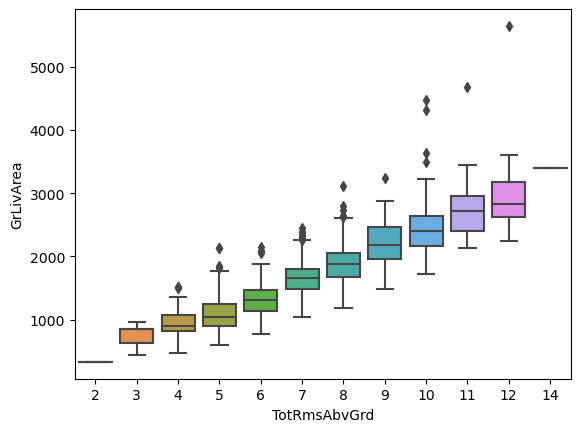

In [23]:
def show_swarm_and_box(data, x, y):
    sns.swarmplot(data=data, x=x, y=y)
    plt.show()
    sns.boxplot(data=data, x=x, y=y)
    plt.show()
show_swarm_and_box(train,"GarageCars","GarageArea")
show_swarm_and_box(train,"TotRmsAbvGrd", "GrLivArea")

In [24]:
train = train.drop(columns=['GarageArea', 'TotRmsAbvGrd', 'Exterior2nd'], axis = 1)
test = test.drop(columns=['GarageArea', 'TotRmsAbvGrd', 'Exterior2nd'], axis = 1)
train.shape

(1460, 28)

# Liczba unikalnych wartości

In [25]:
train.nunique().sort_values(ascending=False)

LotArea         1073
GrLivArea        861
1stFlrSF         753
TotalBsmtSF      721
SalePrice        663
BsmtFinSF1       637
2ndFlrSF         417
MasVnrArea       327
YearBuilt        112
LotFrontage      110
YearRemodAdd      61
Neighborhood      25
Exterior1st       15
OverallQual       10
OverallCond        9
BsmtFinType1       7
Foundation         6
FireplaceQu        6
HeatingQC          5
MSZoning           5
GarageCars         5
FullBath           4
GarageFinish       4
KitchenQual        4
ExterQual          4
LotShape           4
Fireplaces         4
HalfBath           3
dtype: int64

In [26]:
quantity_cols = [col for col in train.columns if train[col].nunique()>25]
quality_cols = [col for col in train.columns if train[col].nunique()<=25]
len(quantity_cols), len(quality_cols)

(11, 17)

# Analiza rozkładów i obserwacji odstających

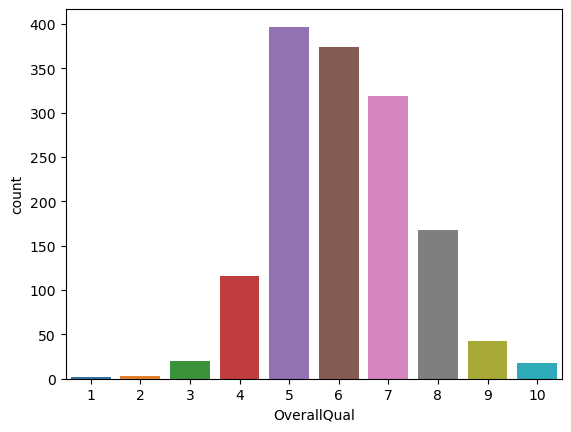

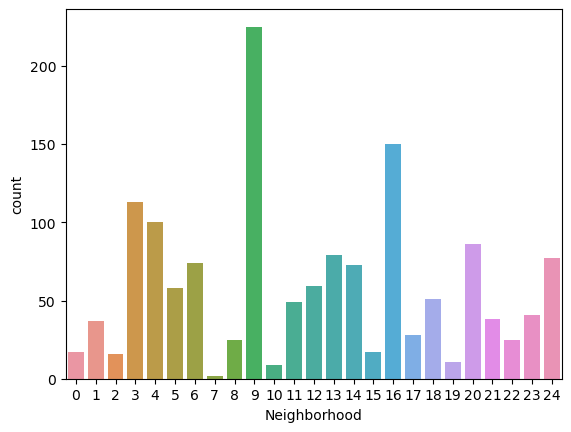

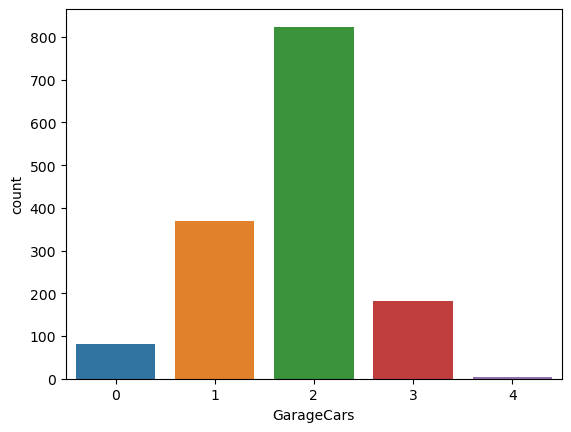

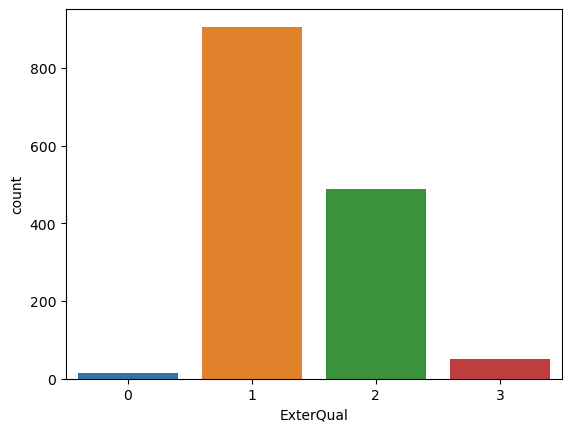

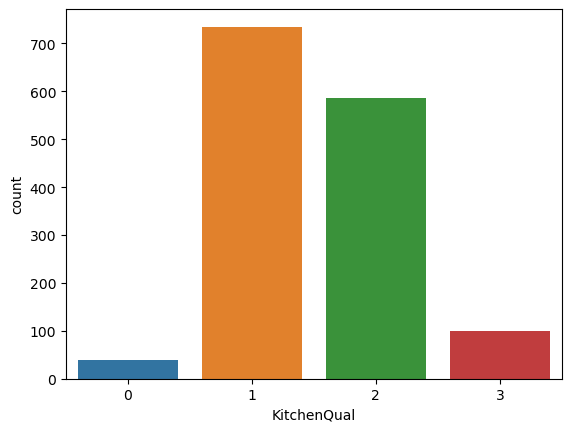

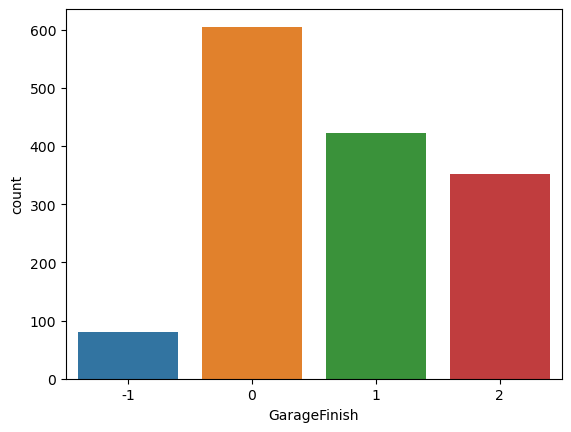

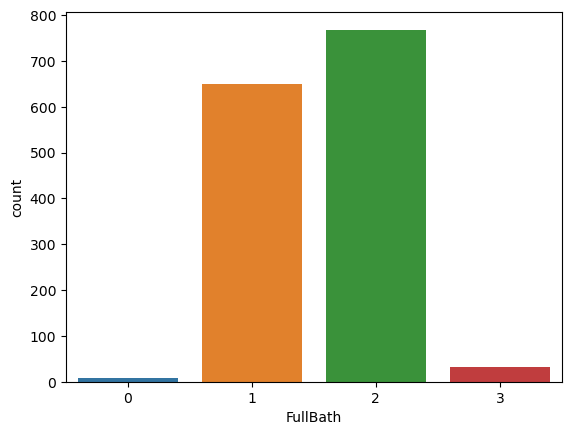

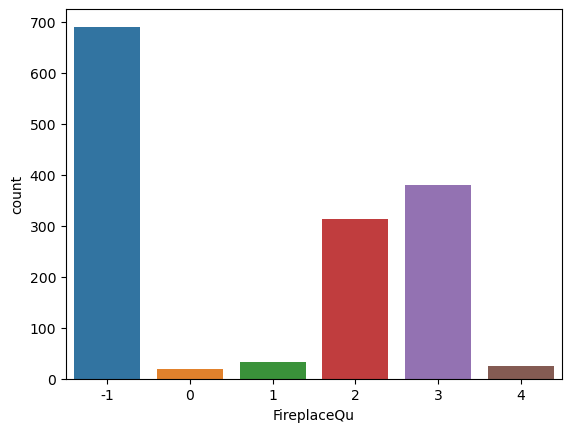

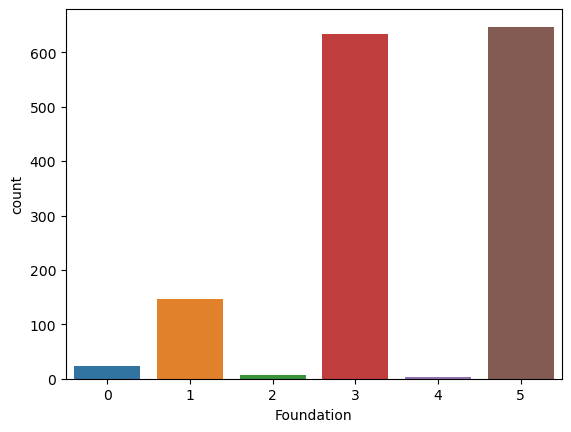

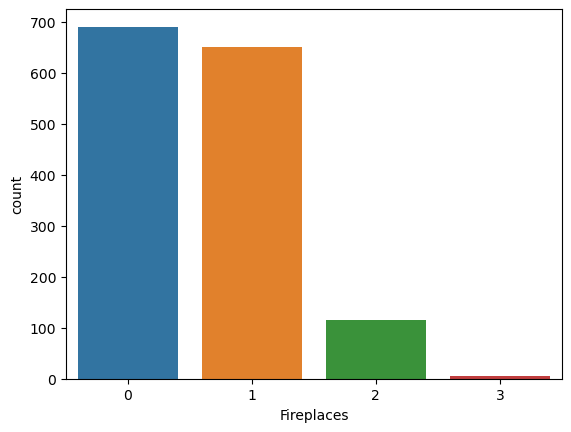

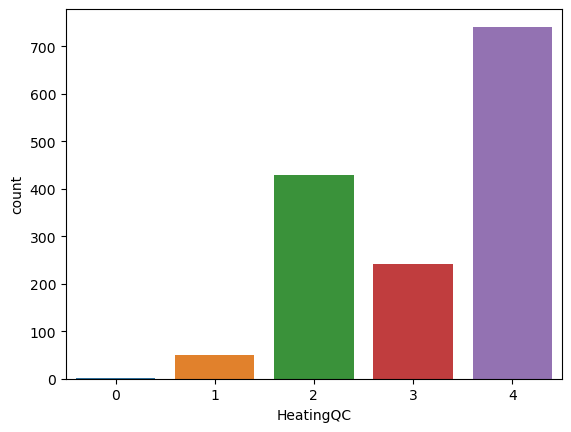

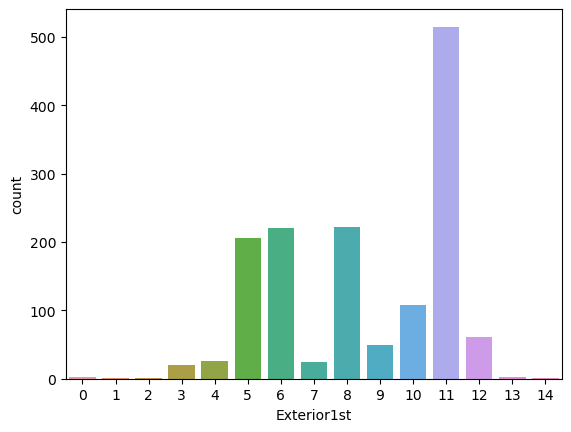

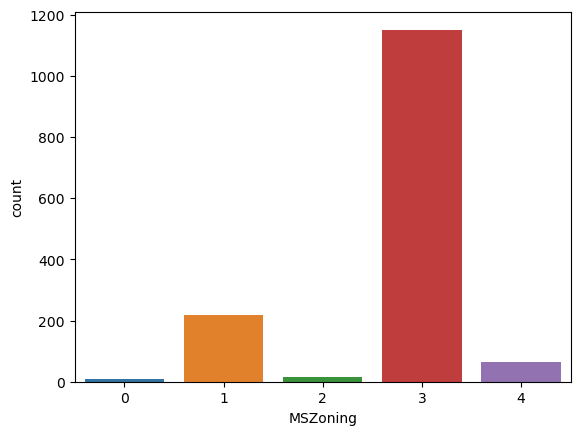

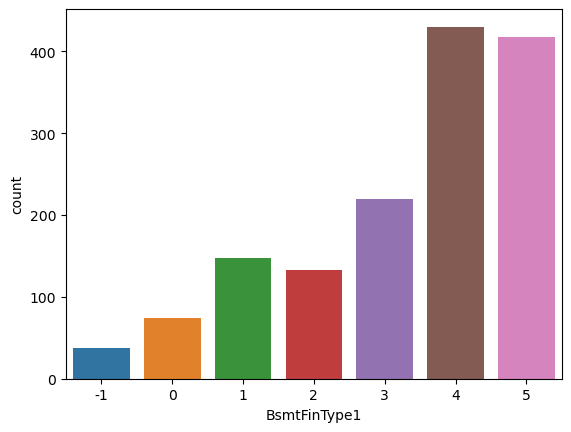

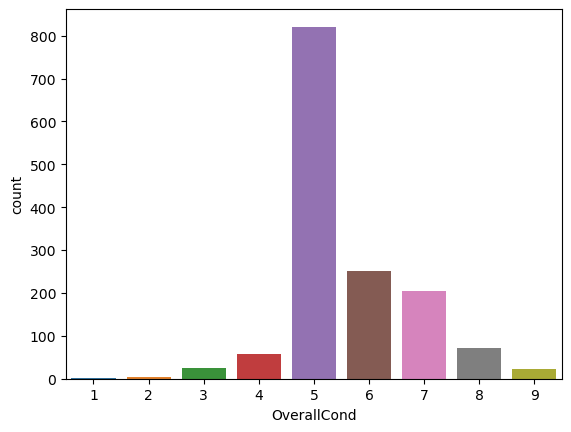

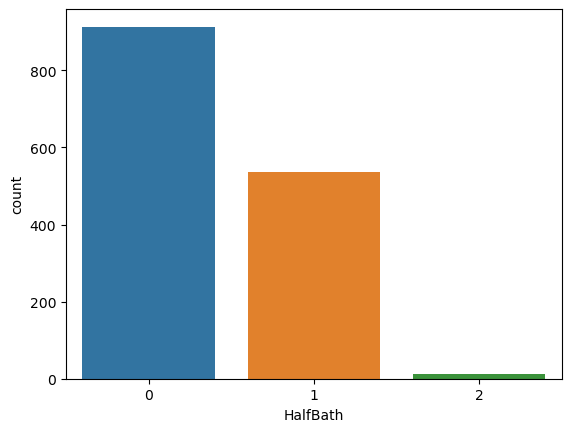

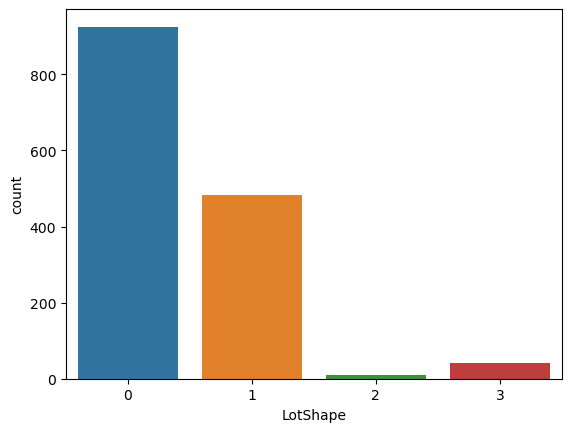

In [27]:
for col in quality_cols:
    sns.countplot(data=train, x=col)
    plt.show()

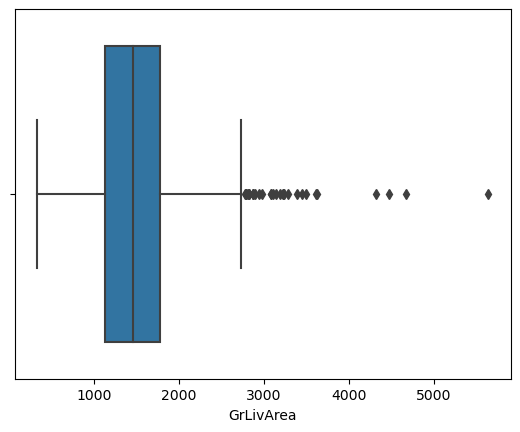

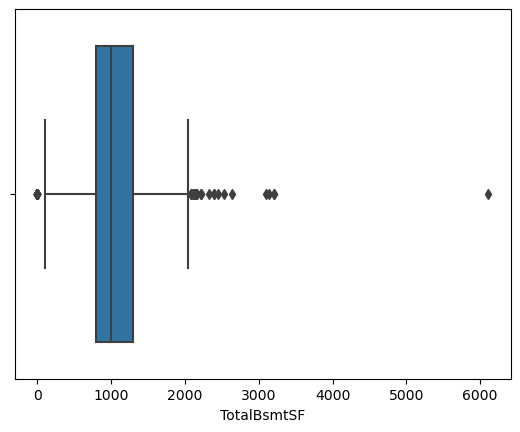

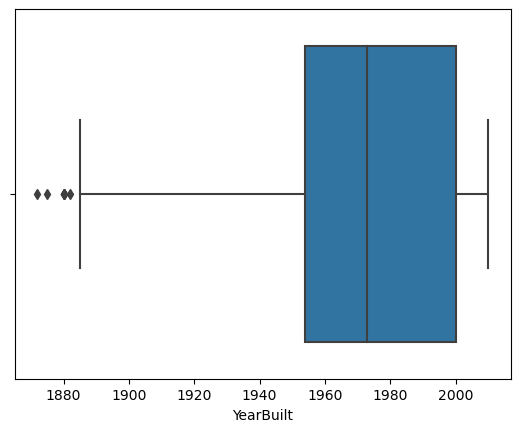

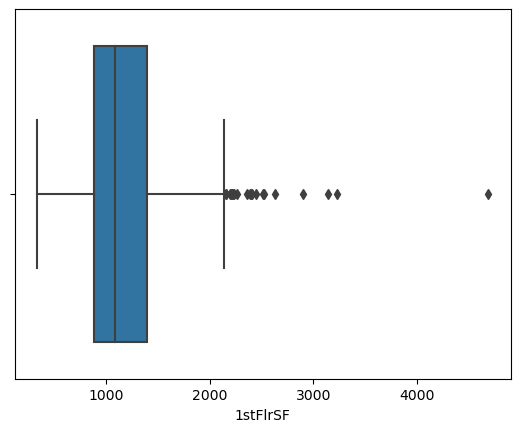

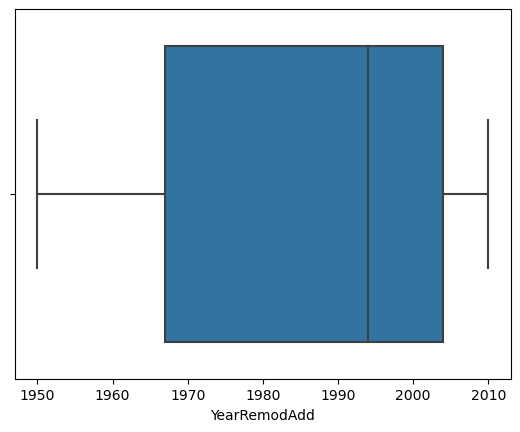

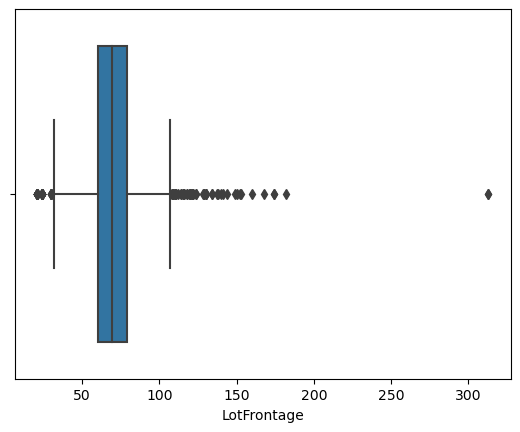

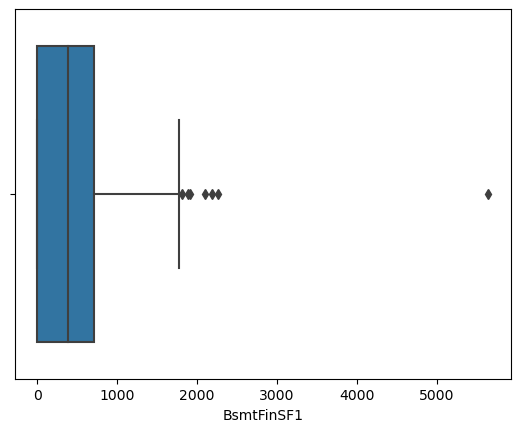

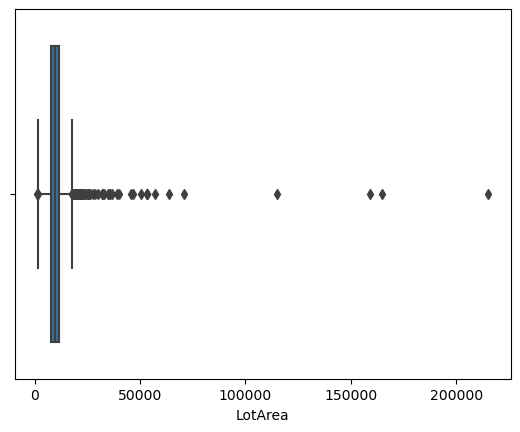

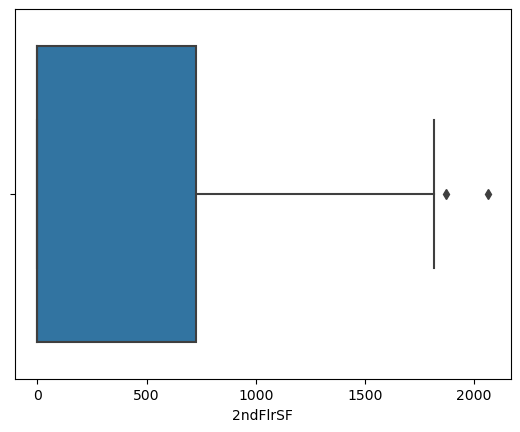

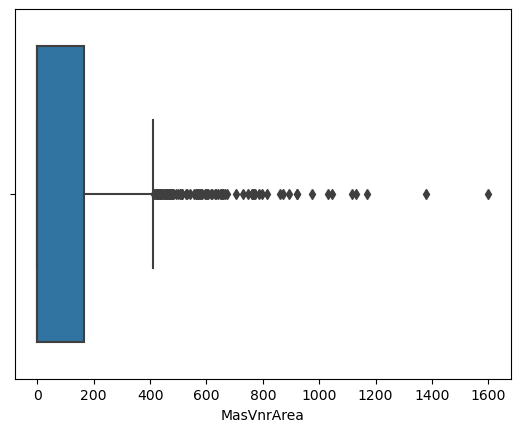

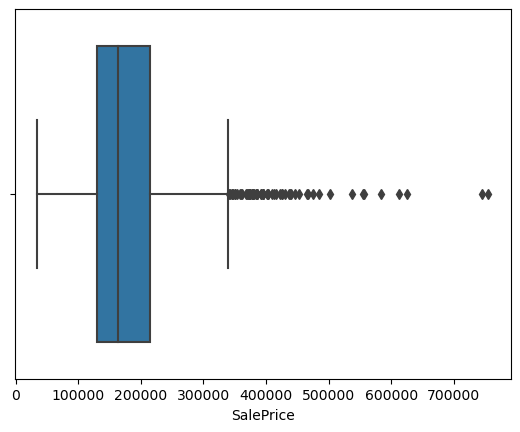

In [28]:
for col in quantity_cols:
    sns.boxplot(data=train, x=col)
    plt.show()


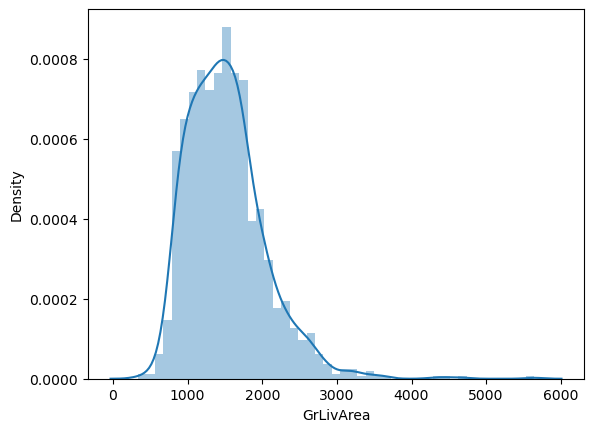

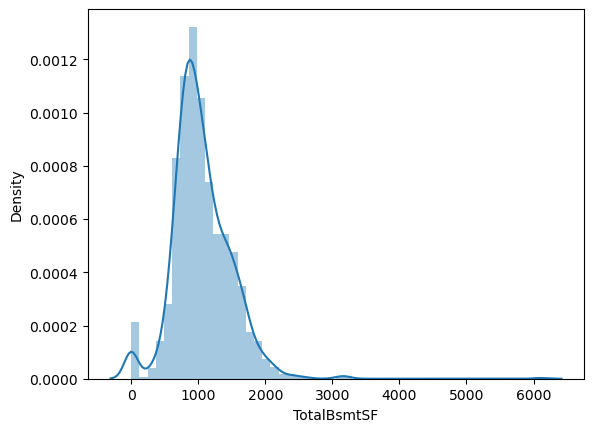

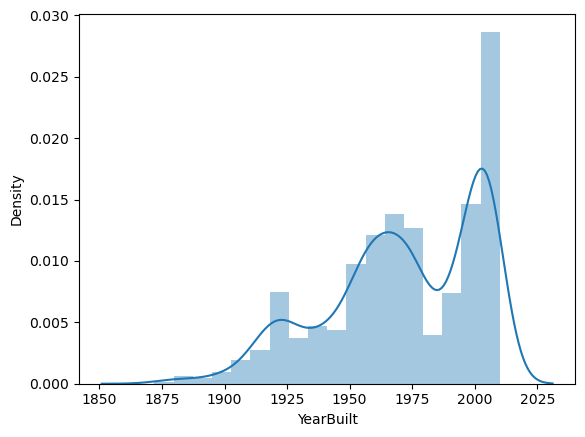

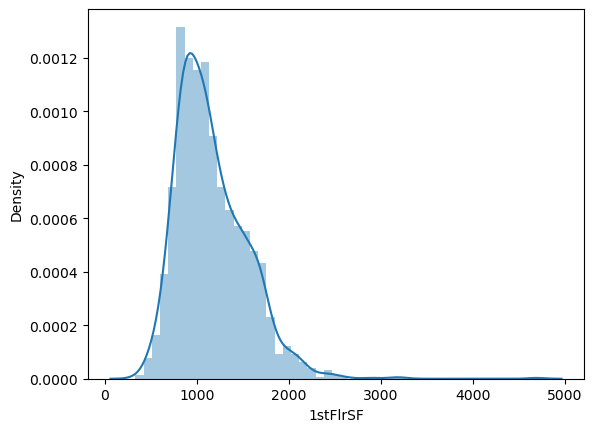

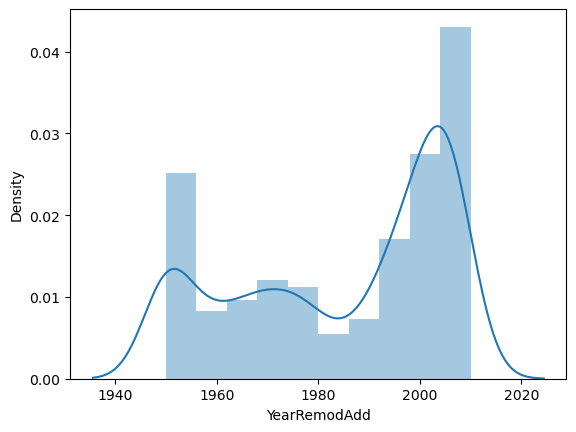

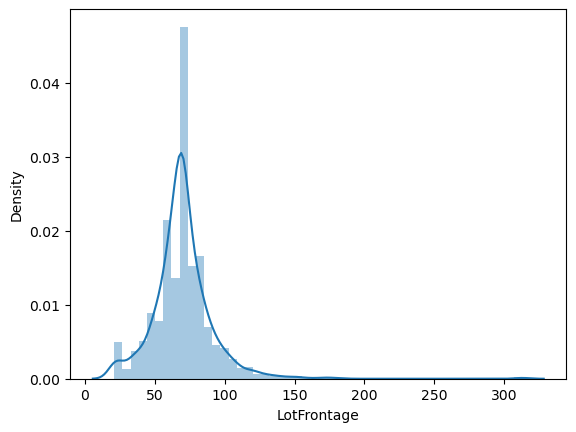

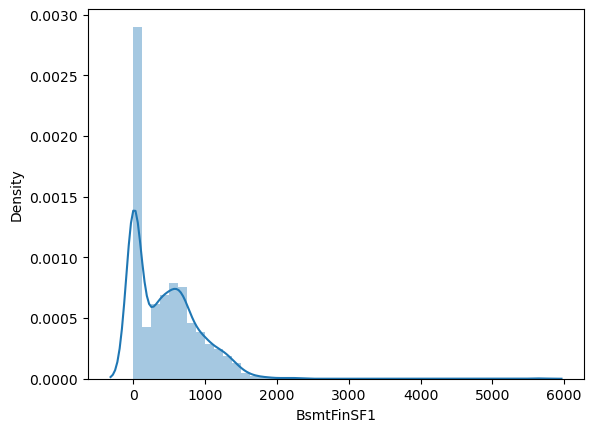

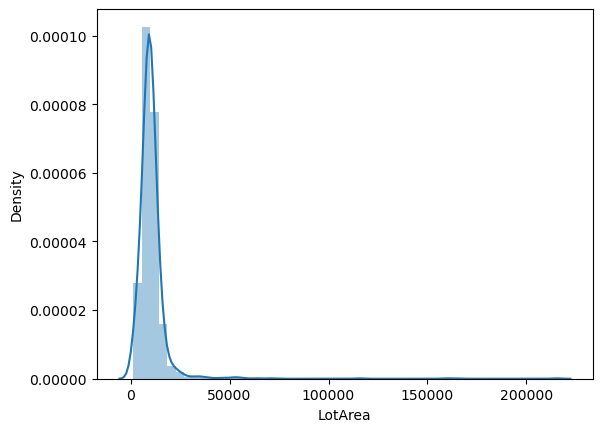

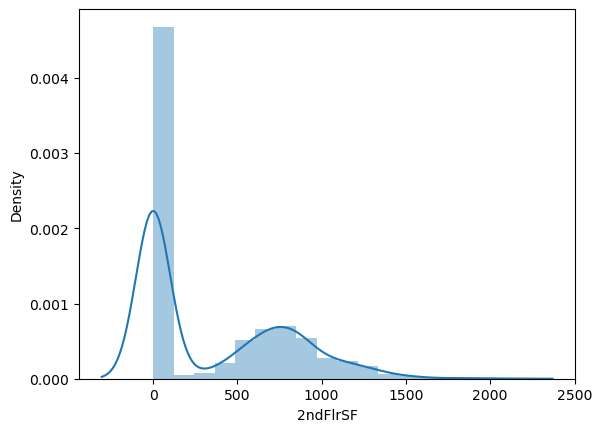

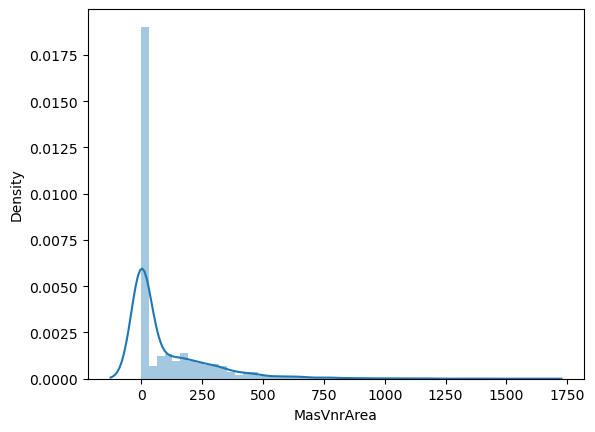

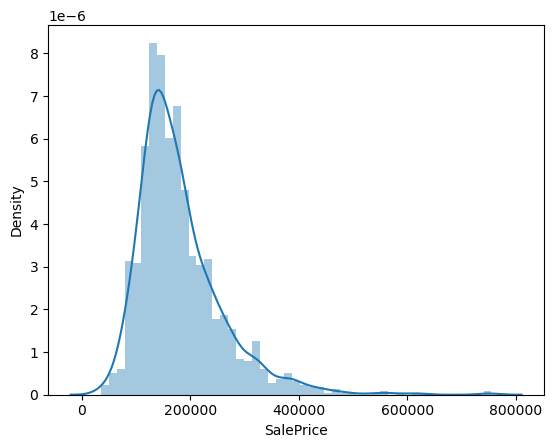

In [29]:
for col in quantity_cols:
    sns.distplot(train.loc[:,col])
    plt.show()

# Usunięcie obserwacji odstających

In [30]:
print(train.shape)
train = train.drop(train[train['GrLivArea'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['1stFlrSF'] > 4000].index)
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['MasVnrArea'] > 1200].index)
print(train.shape)

(1460, 28)
(1449, 28)


# Transformacja zmiennych ze skośnymi rozkładami

In [31]:
skewness = train.apply(lambda x: skew(x)).sort_values()
skewness

MSZoning       -1.543068
BsmtFinType1   -0.886586
YearBuilt      -0.608891
Foundation     -0.605605
HeatingQC      -0.535068
YearRemodAdd   -0.497451
Exterior1st    -0.368380
GarageCars     -0.339392
FullBath        0.018542
FireplaceQu     0.125816
GarageFinish    0.128254
Neighborhood    0.172787
OverallQual     0.178297
KitchenQual     0.385416
TotalBsmtSF     0.485656
Fireplaces      0.636481
HalfBath        0.682225
OverallCond     0.690713
LotFrontage     0.719850
BsmtFinSF1      0.751877
2ndFlrSF        0.766211
GrLivArea       0.814906
ExterQual       0.819943
1stFlrSF        0.873839
SalePrice       1.508275
LotShape        1.852301
MasVnrArea      2.304753
LotArea         4.002799
dtype: float64

In [32]:
positive_skewness = skewness[skewness > 0.75].index
negative_skewness = skewness[skewness < -0.75].index
positive_skewness = positive_skewness.drop('SalePrice')
print(positive_skewness)
print(negative_skewness)

Index(['BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'ExterQual', '1stFlrSF',
       'LotShape', 'MasVnrArea', 'LotArea'],
      dtype='object')
Index(['MSZoning', 'BsmtFinType1'], dtype='object')


In [33]:
train[positive_skewness] = (train[positive_skewness])**(1/3)
test[positive_skewness] = (test[positive_skewness])**(1/3)
train[negative_skewness] = (train[negative_skewness])**3
test[negative_skewness] = (test[negative_skewness])**3
train['SalePrice'] =  np.log1p(train['SalePrice'])

skewness = train.apply(lambda x: skew(x)).sort_values()
skewness

ExterQual      -1.898539
YearBuilt      -0.608891
Foundation     -0.605605
HeatingQC      -0.535068
YearRemodAdd   -0.497451
Exterior1st    -0.368380
BsmtFinSF1     -0.364880
GarageCars     -0.339392
FullBath        0.018542
SalePrice       0.051693
FireplaceQu     0.125816
GarageFinish    0.128254
Neighborhood    0.172787
OverallQual     0.178297
GrLivArea       0.195185
BsmtFinType1    0.250581
1stFlrSF        0.284483
MSZoning        0.340899
2ndFlrSF        0.347807
KitchenQual     0.385416
LotArea         0.452187
TotalBsmtSF     0.485656
Fireplaces      0.636481
LotShape        0.651608
HalfBath        0.682225
OverallCond     0.690713
MasVnrArea      0.692913
LotFrontage     0.719850
dtype: float64

# Podział na dane treningowe i walidacyjne

In [34]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y)
print(X_train.shape, X_val.shape, X.shape)

(1086, 27) (363, 27) (1449, 27)


# Tworzenie modeli

In [35]:
def train_pipeline(pipe):
    result = dict()
    scaler = pipe.steps[0][1].__class__.__name__
    regressor = pipe.steps[1][1].__class__.__name__
    result['model'] = regressor
    result['scaler'] = scaler if scaler != 'NoneType' else 'Without Scaling'
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_val)
    y_val_exp = np.expm1(y_val)
    y_pred_exp = np.expm1(y_pred)
    
    result['r2'] =  r2_score(y_val_exp, y_pred_exp),
    result['mse'] =  mean_squared_error(y_val_exp, y_pred_exp),
    result['rmse'] =  mean_squared_error(y_val_exp, y_pred_exp, squared = False)
    result['msle'] =  mean_squared_log_error(y_val_exp, y_pred_exp),
    result['mape'] =  mean_absolute_percentage_error(y_val_exp, y_pred_exp),
    result['mae'] =  mean_absolute_error(y_val_exp, y_pred_exp)
    return result
    
scalers = [None, StandardScaler(), RobustScaler(), MinMaxScaler()]

regressors = [KNeighborsRegressor(), LinearRegression(),
              Lasso(), Ridge(), ElasticNet(), XGBRegressor(),
              AdaBoostRegressor(), SVR(),
              RandomForestRegressor(), DecisionTreeRegressor(),
              ExtraTreesRegressor(), GradientBoostingRegressor()]

eval_data = pd.DataFrame()
for reg in regressors:
    for sc in scalers:
        pipeline = Pipeline([('scaler', sc), ('reg', reg)])
        eval_data = eval_data.append(pd.DataFrame(train_pipeline(pipeline)))
    eval_data = eval_data.reset_index(drop = True)
eval_data.sort_values('rmse')

,model,scaler,r2,mse,rmse,msle,mape,mae
7,LinearRegression,MinMaxScaler,0.910498,5.299439e+08,23020.510040,0.012412,0.080529,14902.710262
6,LinearRegression,RobustScaler,0.910498,5.299439e+08,23020.510040,0.012412,0.080529,14902.710262
5,LinearRegression,StandardScaler,0.910498,5.299439e+08,23020.510040,0.012412,0.080529,14902.710262
4,LinearRegression,Without Scaling,0.910498,5.299439e+08,23020.510040,0.012412,0.080529,14902.710262
12,Ridge,Without Scaling,0.910479,5.300622e+08,23023.078744,0.012412,0.080537,14907.384844
13,Ridge,StandardScaler,0.910469,5.301167e+08,23024.263045,0.012416,0.080566,14911.247449
14,Ridge,RobustScaler,0.910407,5.304856e+08,23032.273842,0.012422,0.080593,14918.302531
15,Ridge,MinMaxScaler,0.909296,5.370622e+08,23174.603046,0.012560,0.081361,15080.948038
30,SVR,RobustScaler,0.901054,5.858647e+08,24204.641146,0.014099,0.085954,15771.183861
31,SVR,MinMaxScaler,0.897998,6.039587e+08,24575.570307,0.014140,0.085710,16073.087787


# Ujednolicenie kolejności kolumn

In [37]:
columns_order=['OverallQual','Neighborhood','GarageCars', 'GrLivArea','ExterQual', 'KitchenQual','YearBuilt', 'TotalBsmtSF',
              'GarageFinish','FullBath', '1stFlrSF', 'FireplaceQu', 'YearRemodAdd', 'Foundation', 'Fireplaces', 'HeatingQC', 
              'MSZoning', 'BsmtFinSF1','LotFrontage','Exterior1st','BsmtFinType1', 'OverallCond', '2ndFlrSF', 'LotArea',
               'HalfBath', 'MasVnrArea', 'LotShape']
X = X[columns_order]
test = test[columns_order+['Id']]

# Trenowanie wybranego modelu na całych danych treningowych

In [38]:
best_model = LinearRegression()
best_model.fit(X, y) 
for col in test.columns:
    test[col] = test[col].fillna(test[col].median())
y_pred = np.expm1(best_model.predict(test.drop('Id', axis=1)))
y_pred

array([115308.46178529, 160761.00692698, 185333.55715369, ...,
       181404.8054913 , 117474.76801914, 223867.31832052])

# Zapisanie predykcji do pliku csv

In [39]:
df_pred = pd.DataFrame()
df_pred['Id'] = test['Id']
df_pred['SalePrice'] = y_pred
df_pred = df_pred.set_index('Id')
df_pred.to_csv('Predykcja.csv')

In [40]:
test.head()

,OverallQual,Neighborhood,GarageCars,GrLivArea,ExterQual,KitchenQual,YearBuilt,TotalBsmtSF,GarageFinish,FullBath,1stFlrSF,FireplaceQu,YearRemodAdd,Foundation,Fireplaces,HeatingQC,MSZoning,BsmtFinSF1,LotFrontage,Exterior1st,BsmtFinType1,OverallCond,2ndFlrSF,LotArea,HalfBath,MasVnrArea,LotShape,Id
0,5,9,1.0,9.640569,1.000000,1,1961,882.0,0,1,9.640569,-1,1961,3,0,2,8,7.763936,80.0,11,8,6,0.000000,22.651326,0,0.000000,0.0,1461
1,6,9,1.0,10.994488,1.000000,2,1958,1329.0,0,1,10.994488,-1,1958,3,0,2,27,9.736448,81.0,5,27,6,0.000000,24.253675,1,4.762203,1.0,1462
2,5,13,2.0,11.766312,1.000000,1,1997,928.0,2,2,9.753998,2,1998,5,1,3,27,9.248234,74.0,11,125,5,8.883266,24.003472,1,0.000000,1.0,1463
3,6,13,2.0,11.705810,1.000000,2,1998,926.0,2,2,9.746986,3,1998,5,1,4,27,8.443688,78.0,11,125,6,8.785030,21.528536,1,2.714418,1.0,1464
4,8,22,2.0,10.857670,1.259921,2,1992,1280.0,1,2,10.857670,-1,1992,5,0,4,27,6.406959,43.0,8,27,5,0.000000,17.105457,0,0.000000,1.0,1465


# Zapisanie modelu

In [41]:
pickle.dump(best_model, open('model.pkl', 'wb'))